<a href="https://colab.research.google.com/github/Naveenpala001/MiniProject/blob/main/Mini_Project_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader
!mkdir images


In [2]:
from bing_image_downloader import downloader
downloader.download("banana fruit", limit=30,  output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/2331/3573/products/banana.jpg?v=1505655050
[%] File Downloaded !

[%] Downloading Image #2 from http://www.ciaoimports.com/assets/images/Banana.jpg
[!] Issue getting: http://www.ciaoimports.com/assets/images/Banana.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from http://buzzghana.com/wp-content/uploads/2015/08/banana-e1439973458806.png
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/-PB1VYJjSCQE/UREBbiEkphI/AAAAAAAAARM/a1tawzVrOA0/s1600/banana.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.localefoods.com.au/assets/full/RAV003.jpg?1540450782
[!] Issue getting: https://www.localefoods.com.au/assets/full/RAV003.jpg?1540450782
[!] Error:: HTTP Error 522: Origin Connection Time-out
[%] Downloading Image #4 from https://get.pxhere.com/photo/plant-fruit-food-produce-yellow-banana-mature-flowering

In [3]:
from bing_image_downloader import downloader
downloader.download("guava fruit", limit=30,  output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://healthjade.com/wp-content/uploads/2018/05/guava-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.shopify.com/s/files/1/0076/4339/8233/products/guava.jpg?v=1543324340
[%] File Downloaded !

[%] Downloading Image #3 from https://1.bp.blogspot.com/-VXq_4BIpU5o/Vo_ZwO1okMI/AAAAAAAABy4/k5MZgInsgK8/s1600/guava.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://meaningzone.com/wp-content/uploads/2019/10/Guava-Fruit-Dream-Meaning-and-Symbolism.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://ititropicals.com/wp-content/uploads/guava_fruit_2.png
[%] File Downloaded !

[%] Downloading Image #6 from https://webstockreview.net/images/clipart-fruit-guava-13.png
[%] File Downloaded !

[%] Downloading Image #7 from https://defeatdiabetes.org/wp-content/uploads/2018/05/guava-benefits.jpg
[%] File Downloaded !

[%] Downloading Image #8 from http://www.t

In [4]:
from bing_image_downloader import downloader
downloader.download("apple fruit", limit=30,  output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://vignette.wikia.nocookie.net/fruits-information/images/2/2b/Apple.jpg/revision/latest?cb=20180802112257
[%] File Downloaded !

[%] Downloading Image #2 from https://www.healthbenefitstimes.com/9/gallery/apple/Apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://medilifefood.com/wp-content/uploads/2019/10/purepng.com-red-appleappleapplesfruitsweet-1701527180174lrnig.png
[%] File Downloaded !

[%] Downloading Image #4 from http://dreamicus.com/data/apple/apple-01.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.setaswall.com/wp-content/uploads/2018/05/Apple-Fruit-Grass-Wallpaper-720x1520.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.chhajedgarden.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/0/4/04_apples.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.theayurveda.org/wp-content/up

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATAGORIES=['apple fruit','banana fruit','guava fruit']

for catagory in CATAGORIES:
  class_num=CATAGORIES.index(catagory)
  path=os.path.join(DATADIR,catagory)
  for img in os.listdir(path):
   img_array= imread(os.path.join(path,img))
   #print(img_array.shape)
   #plt.imshow(img_array)
   #break
   img_resized=resize(img_array,(150,150,3))
   flat_data.append(img_resized.flatten())
   images.append(img_resized)
   target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
            ]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 0, 2])

In [9]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7777777777777778

In [11]:
confusion_matrix(y_pred,y_test)

array([[7, 3, 0],
       [0, 6, 0],
       [1, 2, 8]])

In [12]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [13]:
model=pickle.load(open('img_model.p','rb'))

Enter the url/content/drive/MyDrive/Banana.jpg
(800, 1200, 3)
 PREDICTED OUTPUT:banana fruit


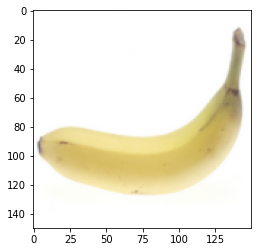

In [16]:
flat_data=[]
url=input("Enter the url")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATAGORIES[y_out[0]]
print(f' PREDICTED OUTPUT:{y_out}')